<a href="https://colab.research.google.com/github/xvfdesii/Coffee-Leaf-Disease-Classification-System/blob/main/Klasifikasi_Daun_Kopi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import os
from zipfile import ZipFile

# Parameter
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
EPOCHS = 50

# Step 1: Ekstraksi ZIP ke direktori yang bisa diakses
zip_path = "/content/archive.zip"  # Sesuaikan path file ZIP
extract_path = "/content/dataset"  # Direktori tujuan ekstraksi

# Ekstraksi ZIPa
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"Dataset berhasil diekstrak ke {extract_path}")

# Step 2: Definisikan path ke folder train dan test
train_dir = os.path.join(extract_path, "train")
test_dir = os.path.join(extract_path, "test")

# Step 3: Load TRAIN dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Step 4: Load TEST dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    shuffle=False,  # Biasanya test data tidak perlu di-shuffle
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Verifikasi hasil loading
class_names = train_dataset.class_names
print("Kelas pada dataset TRAIN:", class_names)

# Melihat batch pertama (opsional)
for images, labels in train_dataset.take(1):
    print(f"Shape batch image: {images.shape}")
    print(f"Shape batch label: {labels.shape}")


Dataset berhasil diekstrak ke /content/dataset
Found 1264 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Kelas pada dataset TRAIN: ['miner', 'nodisease', 'phoma', 'rust']
Shape batch image: (32, 256, 256, 3)
Shape batch label: (32,)


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/train",
    seed=123,
    shuffle=True,
    # Replace IMAGE_SIZEx and IMAGE_SIZEy with actual values or define them.
    image_size=(256, 256),  # Assuming you want 256x256 images.
    batch_size=BATCH_SIZE
)

Found 1264 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['miner', 'nodisease', 'phoma', 'rust']

In [ ]:
len(dataset)

40

In [ ]:
train_size = 0.8
len(dataset)*train_size

32.0

In [ ]:
train_ds = dataset.take(13)
len(train_ds)

13

In [ ]:
test_ds = dataset.skip(13)
len(test_ds)

27

In [ ]:
val_size=0.1
len(dataset)*val_size

4.0

In [ ]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [ ]:
test_ds = test_ds.skip(1)
len(test_ds)

26

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

32

In [ ]:
len(val_ds)

4

In [ ]:
len(test_ds)

4

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import models, layers

# Accessing the elements of the IMAGE_SIZE tuple
IMAGE_SIZEx, IMAGE_SIZEy = IMAGE_SIZE

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZEx, IMAGE_SIZEy),
  layers.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
CHANNELS = 3

n_classes = 4

model = models.Sequential()
# Remove the input_shape argument from the first Conv2D layer
model.add(layers.Resizing(IMAGE_SIZEx, IMAGE_SIZEy))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu')) # Removed input_shape here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))

# Now, you can build the model with the desired input shape
input_shape = (None, IMAGE_SIZEx, IMAGE_SIZEy, CHANNELS)
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_5 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model (stop at epoch 20)
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=12,  # Set epochs to 20
    callbacks=[early_stopping]
)


Epoch 1/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 176s 5s/step - accuracy: 0.2945 - loss: 1.3720 - val_accuracy: 0.4688 - val_loss: 1.2777
Epoch 2/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.4368 - loss: 1.2276 - val_accuracy: 0.4453 - val_loss: 1.1652
Epoch 3/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 145s 5s/step - accuracy: 0.4637 - loss: 1.1113 - val_accuracy: 0.5078 - val_loss: 1.0611
Epoch 4/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.5082 - loss: 1.0076 - val_accuracy: 0.5000 - val_loss: 1.0868
Epoch 5/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.5545 - loss: 0.9931 - val_accuracy: 0.5938 - val_loss: 0.8917
Epoch 6/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5879 - loss: 0.9268 - val_accuracy: 0.6562 - val_loss: 0.7567
Epoch 7/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.6727 - loss: 0.7547 - val_accuracy: 0.6094 - val_loss: 0.9299
Epoch 8/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - accuracy: 0.6839 - loss: 0.7180 - val_accuracy: 0.7344 - v

In [ ]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9312 - loss: 0.2249


In [ ]:
scores

[0.2194305807352066, 0.9375]

In [ ]:
history.params

{'verbose': 1, 'epochs': 12, 'steps': 32}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['accuracy'])

12

In [ ]:
history.history['val_accuracy']

[0.46875,
 0.4453125,
 0.5078125,
 0.5,
 0.59375,
 0.65625,
 0.609375,
 0.734375,
 0.78125,
 0.84375,
 0.921875,
 0.8828125]

In [ ]:
history.history['loss'][:5]

[1.3590573072433472,
 1.187583565711975,
 1.0986449718475342,
 0.9733195304870605,
 0.9494248032569885]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

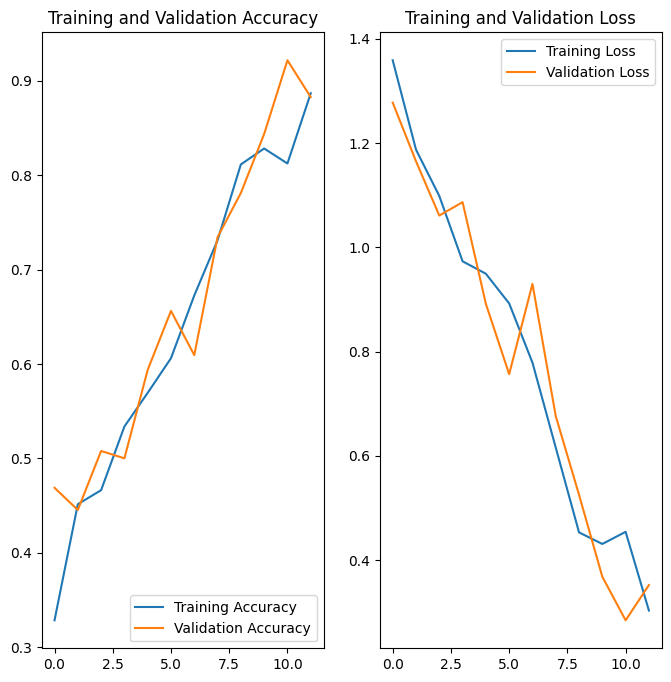

In [ ]:
import matplotlib.pyplot as plt # Import the necessary module
# ... (Your existing code)

# Get the number of epochs from the history object
num_epochs = len(history.history['accuracy'])

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# Use num_epochs to define the x-axis range
plt.plot(range(num_epochs), acc, label='Training Accuracy')
plt.plot(range(num_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
# Use num_epochs to define the x-axis range
plt.plot(range(num_epochs), loss, label='Training Loss')
plt.plot(range(num_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: phoma
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label: phoma


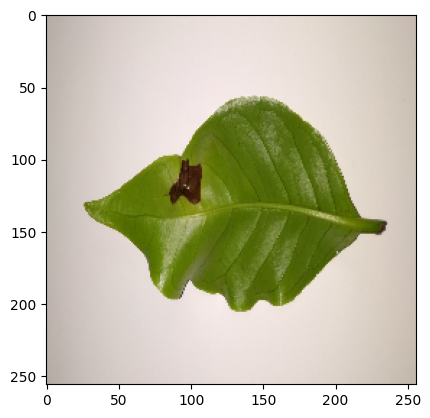

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


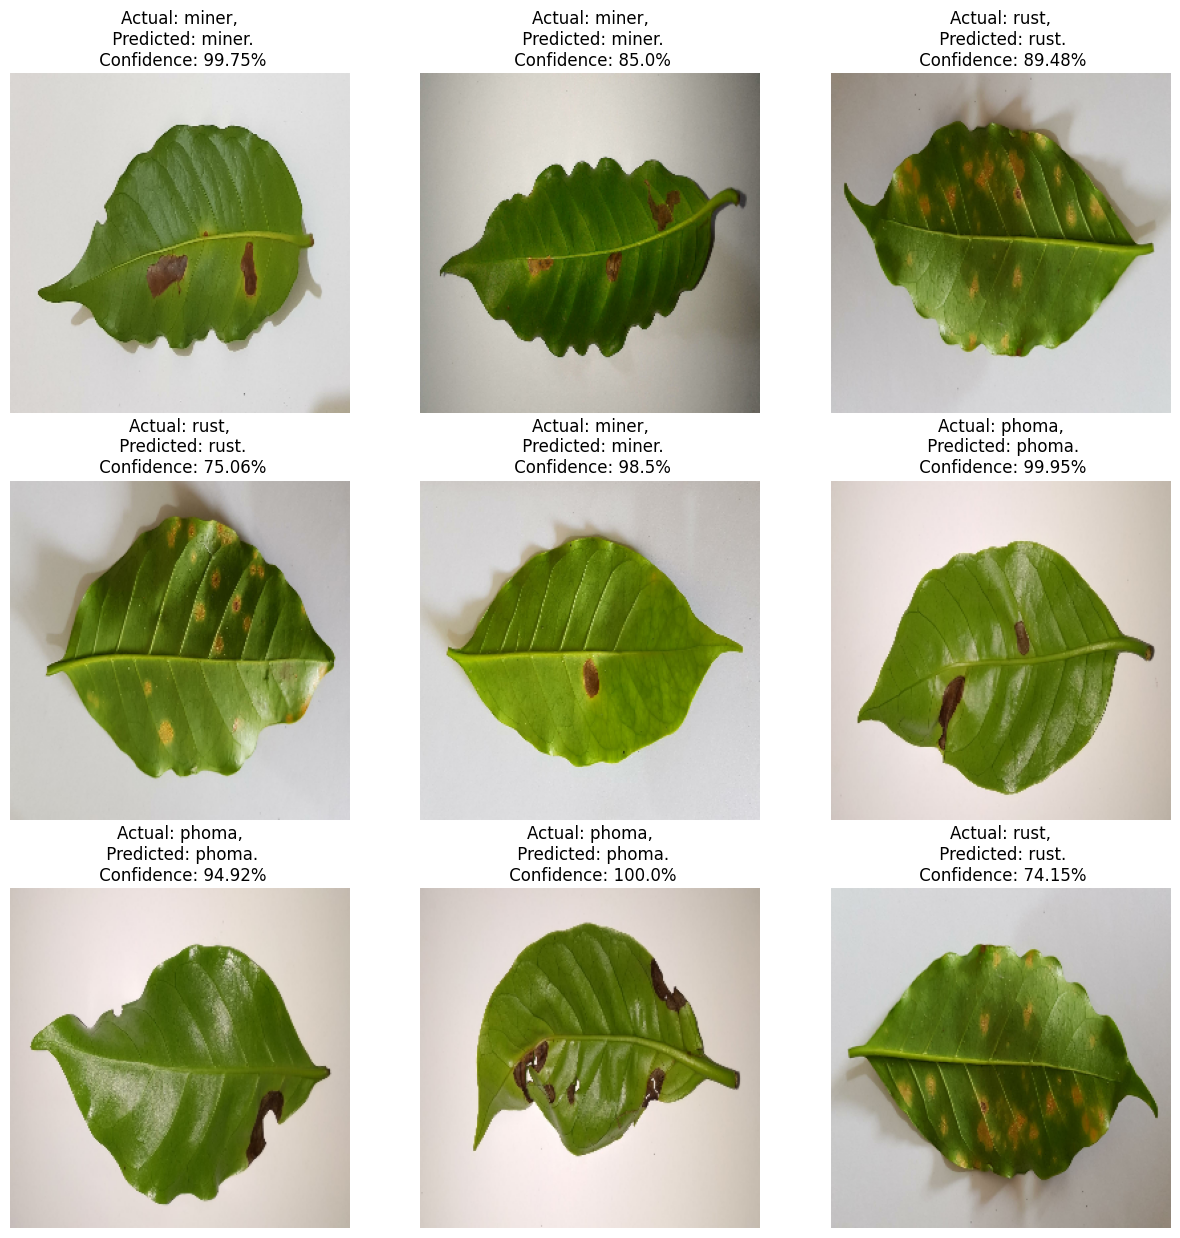

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")